<a href="https://colab.research.google.com/github/setran11/ds1002-mnd4up/blob/main/homework/week-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Week 15

Complete the following blocks as specified in the directions. Run each cell to return the desired output. Save your notebook back to your GitHub repository and submit the GitHub URL to your notebook for review.

## 1. Create Functions (4 pts)

Create two functions in the cells below, according to the prompts given.

In [ ]:
# create a function in R that:
#   1. takes a single integer as an input parameter
#   2. determines whether the integer is even or odd
#   3. returns a character statement "The integer <x> is even" or "The integer <x> is odd" (replace <x> with the actual input provided)
#
# then execute the function twice using two different input values, displaying even and odd results.

odd_or_even <- function(x) { if (x%% 2 == 1) {
  print(paste("The integer", x, "is odd"))
} else {
  print(paste("The integer", x, "is even"))
}
}

In [ ]:
odd_or_even(11)

[1] "The integer 11 is odd"


In [ ]:
odd_or_even(14)

[1] "The integer 14 is even"


In [ ]:
# create a function in R that:
#   1. takes 4 integer input parameters
#   2. returns the mean value of the inputs
#   3. has default values for the 4 input parameters, in case they are not provided when the function is called.
#
# then execute the function twice: once where you provide the input values, and once where you do not.

mean_vars <- function(var1 = 1, var2 = 2, var3 = 3, var4 = 4) {
  mean_of_vars = (var1 + var2 + var3 + var4)/4
  mean_of_vars
}

In [ ]:
mean_vars(3, 11, 13, 31)

[1] 14.5

In [ ]:
mean_vars()

[1] 2.5

## 2. Plot Data (4 pts)

In the cell below, write the code required to plot from the `msleep` sample data set.

1. Display only animals with body weights of 30 or greater.
2. Group the animals by `order`.
3. Display the mean `sleep_total` for each group in a bar plot.

In [ ]:
install.packages("tidyverse")
library(tidyverse)

In [ ]:
data <- msleep %>%
  select(bodywt, order, sleep_total) %>%
  filter(bodywt >= 30) %>%
  na.omit() %>%
  group_by(order) %>%
  summarize(mean_sleep_total = mean(sleep_total), na.rm = TRUE)

data

order,mean_sleep_total,na.rm
<chr>,<dbl>,<lgl>
Artiodactyla,4.820000,TRUE
Carnivora,10.250000,TRUE
Cetacea,4.500000,TRUE
Cingulata,18.100000,TRUE
Perissodactyla,3.466667,TRUE
Primates,8.850000,TRUE
Proboscidea,3.600000,TRUE


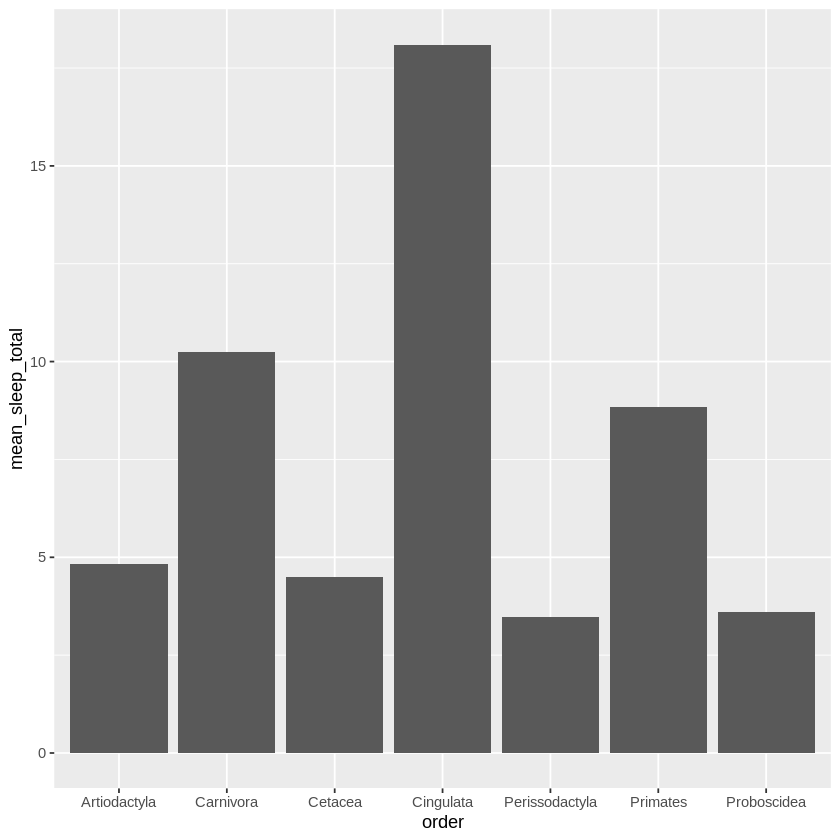

In [ ]:
ggplot(data, aes(x = order, y = mean_sleep_total)) + geom_col()

## 3. Clean and Analyze Data Using R (4 pts)

In the cells below use R to perform the following data cleaning steps on this file:
https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv

1. Remove any duplicate rows.
2. Remove any records where `last_login` or `birthdate` are empty.
3. Display only the records with the 10 highest `follower` counts.
4. Determine counts of users when grouped by continent.

In [ ]:
df <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv")
df

In [2]:
# remove any duplicate rows
nrow(df[duplicated(df), ])
df2 <- df[!duplicated(df), ]
nrow(df2[duplicated(df2), ])

[1] 318

[1] 0

In [3]:
# remove any records where last_login or birthdate are empty
df2[df2==""] <- NA
df3 <- na.omit(df2)

In [ ]:
# display only the records with the 10 highest follower counts
df3 %>%
  arrange(desc(followers)) %>%
  slice(1:10)

In [ ]:
# determine counts of users when grouped by continent
df3 %>%
  select(continent) %>%
  count(continent == "OC")

df3 %>%
  select(continent) %>%
  count(continent == "AF")

df3 %>%
  select(continent) %>%
  count(continent == "SA")

df3 %>%
  select(continent) %>%
  count(continent == "AS")

df3 %>%
  select(continent) %>%
  count(continent == "EU")

"continent == ""OC""",n
<lgl>,<int>
FALSE,327
TRUE,95


"continent == ""AF""",n
<lgl>,<int>
FALSE,352
TRUE,70


"continent == ""SA""",n
<lgl>,<int>
FALSE,353
TRUE,69


"continent == ""AS""",n
<lgl>,<int>
FALSE,311
TRUE,111


"continent == ""EU""",n
<lgl>,<int>
FALSE,345
TRUE,77


In [13]:
# CORRECTION TO LAST QUESTION:
table(df3["continent"])

continent
 AF  AS  EU  OC  SA 
 70 111  77  95  69 

In [ ]:
# WHAT I DID WRONG:
""" I used piping to count the number of users in each continent with booleans so that each
occurence of that specific continent within the data would be true and the number of TRUE
values was the number of continents, rather than correctly determine the counts. """